http://geatpy.com/index.php/quickstart/

http://geatpy.com/index.php/2019/07/28/%E7%AC%AC%E4%B8%83%E7%AB%A0%EF%BC%9A%E5%A4%9A%E7%9B%AE%E6%A0%87%E4%BC%98%E5%8C%96/

https://github.com/geatpy-dev/geatpy/tree/master/demo

求解器写法 & **※面向对象写法**

## 单目标优化

gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   20   | 9.18566E+00 | 9.18566E+00 | 9.18566E+00 | 9.18566E+00 | 0.00000E+00 
 1 |   40   | 5.78235E+00 | 9.18566E+00 | 8.33483E+00 | 5.78235E+00 | 1.47368E+00 
 2 |   60   | 5.78235E+00 | 1.01857E+01 | 8.44530E+00 | 5.78235E+00 | 1.56014E+00 
 3 |   80   | 5.18566E+00 | 9.18566E+00 | 7.10178E+00 | 5.18566E+00 | 1.70646E+00 
 4 |  100   | 2.18566E+00 | 5.78235E+00 | 5.31974E+00 | 2.18566E+00 | 1.00074E+00 
 5 |  120   | 2.18566E+00 | 5.71252E+00 | 4.47875E+00 | 2.18566E+00 | 1.38039E+00 
 6 |  140   | 2.18566E+00 | 5.18566E+00 | 2.88560E+00 | 2.18566E+00 | 1.09847E+00 
 7 |  160   | 2.02037E+00 | 2.18566E+00 | 2.15260E+00 | 2.02037E+00 | 6.61145E-02 
 8 |  180   | 2.00000E+00 | 2.18565E+00 | 2.02762E+00 | 2.00000E+00 | 3.65244E-02 
 9 |  200   | 2.00000E+00 | 2.02037E+00 | 2.01625E+00 | 2.00000E+00 | 8.12936E-03 
 10|

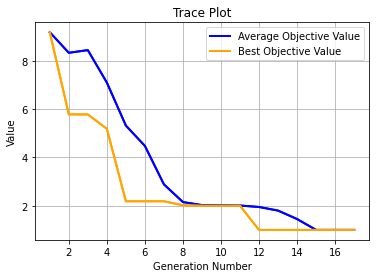

Execution time: 0.02863931655883789 s
Evaluation number: 340
The best objective value is: 1.0
The best variables are: 
1.0	1.0	2.0	1.0	1.0	


array([[1.]])

In [1]:
import geatpy as ea
import numpy as np


# 构建问题
r = 1  # 目标函数需要用到的额外数据
@ea.Problem.single
def evalVars(Vars):  # 定义目标函数（含约束）
    f = np.sum((Vars - r) ** 2)  # 计算目标函数值
    x1 = Vars[0]
    x2 = Vars[1]
    CV = np.array([(x1 - 0.5)**2 - 0.25,
                    (x2 - 1)**2 - 1])  # 计算违反约束程度。值越大，违反约束的程度就越大
    return f, CV

problem = ea.Problem(name='soea quick start demo',
                        M=1,  # 最优化问题的目标维数
                        maxormins=[1],  # 目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标
                        Dim=5,  # 决策变量维数
                        varTypes=[0, 0, 1, 1, 1],  # 决策变量的类型列表，0：实数；1：整数
                        lb=[-1, 1, 2, 1, 0],  # 决策变量下界
                        ub=[1, 4, 5, 2, 1],  # 决策变量上界
                        evalVars=evalVars)
# 构建算法
algorithm = ea.soea_SEGA_templet(problem,
                                    ea.Population(Encoding='RI', NIND=20), # Encoding='RI'表示改种群的染色体是'RI'编码，即“实数整数混合编码”，简称“实整数编码”。类似的还有'P'编码（排列编码，可以让对应的变量互不相同）、'BG'编码（二进制/格雷码编码）。然后NIND=20设定了种群有20个个体。
                                    MAXGEN=50,  # 最大进化代数。
                                    logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
                                    trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
                                    maxTrappedCount=10)  # 进化停滞计数器最大上限值。
# 求解
# res = ea.optimize(algorithm, seed=1, verbose=True, drawing=1, outputMsg=True, drawLog=False, saveFlag=True, dirName='result')
res = ea.optimize(algorithm, seed=1, verbose=True, drawing=1, outputMsg=True, drawLog=False, saveFlag=False)
# 其中seed=1表示设置随机数种子。如果不想设置随机数种子，则把它设为None，或者不把它传入到optimize()函数中。dirName='result'表示把求解结果以文件的形式保存在当前工作目录下的result文件夹中。如果不传入dirName或者设dirName为None，则默认会以求解的起始时间的信息作为文件夹，把结果保存在里面。optimize()函数的其他传入参数以及31行获得的返回值res（类型为python字典）的内容可以用help(ea.optimize)或跳转进入源码查看。例如res['ObjV']表示算法搜索到的最佳目标函数值（它是个Numpy ndarray二维数组，每一行表示一组目标函数值。）；res['Vars']表示对应的决策变量值矩阵（Numpy ndarray二维数组，每一行表示一组决策变量值）。
res['ObjV']

## 多目标优化

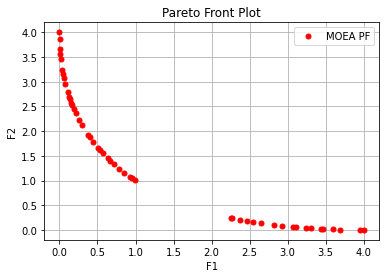

Execution time: 0.11645197868347168 s
Evaluation number: 10000
The number of non-dominated solutions is: 50
hv: 0.83020
spacing: 0.03503


In [2]:
import geatpy as ea
import numpy as np


class MyProblem(ea.Problem):  # 继承Problem父类
    def __init__(self):
        name = 'MyProblem'  # 初始化name（函数名称，可以随意设置）
        M = 2  # 优化目标个数
        maxormins = [1] * M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 1  # 初始化Dim（决策变量维数）
        varTypes = [0]  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [-10]  # 决策变量下界
        ub = [10]  # 决策变量上界
        lbin = [1]  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1]  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    def evalVars(self, Vars):  # 目标函数
        f1 = Vars ** 2
        f2 = (Vars - 2) ** 2
        ObjV = np.hstack([f1, f2])  # 计算目标函数值矩阵
        CV = -Vars ** 2 + 2.5 * Vars - 1.5  # 构建违反约束程度矩阵
        return ObjV, CV

# 实例化问题对象
problem = MyProblem()
# 构建算法
algorithm = ea.moea_NSGA2_templet(problem,
                                    ea.Population(Encoding='RI', NIND=50), #二进制编码，因为权威整数
                                    MAXGEN=200,  # 最大进化代数
                                    logTras=0)  # 表示每隔多少代记录一次日志信息，0表示不记录。
# 求解
res = ea.optimize(algorithm, seed=1, verbose=False, drawing=1, outputMsg=True, drawLog=False, saveFlag=False)

## DEMO（面向对象写法）

gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   40   | 3.55049E+00 | 3.55049E+00 | 1.98055E+00 | 5.56362E-01 | 6.51442E-01 
 1 |   80   | 3.55055E+00 | 3.55055E+00 | 2.69838E+00 | 2.05290E+00 | 4.86341E-01 
 2 |  120   | 3.55216E+00 | 3.55216E+00 | 3.20607E+00 | 2.59192E+00 | 2.86413E-01 
 3 |  160   | 3.85027E+00 | 3.85027E+00 | 3.52322E+00 | 3.44897E+00 | 6.89226E-02 
 4 |  200   | 3.85027E+00 | 3.85027E+00 | 3.57376E+00 | 3.52298E+00 | 7.12709E-02 
 5 |  240   | 3.85027E+00 | 3.85027E+00 | 3.62239E+00 | 3.55065E+00 | 7.39298E-02 
 6 |  280   | 3.85027E+00 | 3.85027E+00 | 3.67872E+00 | 3.62776E+00 | 8.61019E-02 
 7 |  320   | 3.85027E+00 | 3.85027E+00 | 3.72631E+00 | 3.62872E+00 | 1.01210E-01 
 8 |  360   | 3.85027E+00 | 3.85027E+00 | 3.79120E+00 | 3.64999E+00 | 8.87366E-02 
 9 |  400   | 3.85027E+00 | 3.85027E+00 | 3.85026E+00 | 3.85011E+00 | 3.77533E-05 
 10|

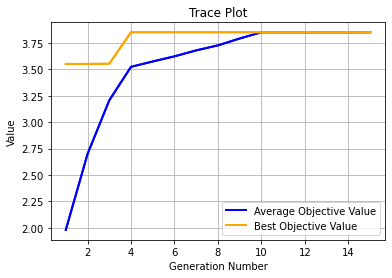

Execution time: 0.009249687194824219 s
Evaluation number: 600
The best objective value is: 3.850273765275573
The best variables are: 
1.8505487442016602	
{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the trapped count limit.', 'optPop': <geatpy.Population.Population object at 0x00000243DA801388>, 'lastPop': <geatpy.Population.Population object at 0x00000243DA801348>, 'Vars': array([[1.85054874]]), 'ObjV': array([[3.85027377]]), 'CV': None, 'executeTime': 0.009249687194824219, 'nfev': 600, 'startTime': '2022-08-09 11h-49m-40s', 'endTime': '2022-08-09 11h-49m-41s'}


In [3]:
"""Demo.
max f = x * np.sin(10 * np.pi * x) + 2.0
s.t.
-1 <= x <= 2
"""

import numpy as np
import geatpy as ea


class MyProblem(ea.Problem):  # 继承Problem父类

    def __init__(self):
        name = 'MyProblem'  # 初始化name（函数名称，可以随意设置）
        M = 1  # 初始化M（目标维数）
        maxormins = [-1]  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 1  # 初始化Dim（决策变量维数）
        varTypes = [0] * Dim  # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
        lb = [-1]  # 决策变量下界
        ub = [2]  # 决策变量上界
        lbin = [1] * Dim  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self,
                            name,
                            M,
                            maxormins,
                            Dim,
                            varTypes,
                            lb,
                            ub,
                            lbin,
                            ubin)

    def evalVars(self, x):  # 目标函数
        f = x * np.sin(10 * np.pi * x) + 2.0
        return f


if __name__ == '__main__':
    # 实例化问题对象
    problem = MyProblem()
    # 构建算法
    algorithm = ea.soea_SEGA_templet(
        problem,
        ea.Population(Encoding='RI', NIND=40),
        MAXGEN=25,  # 最大进化代数。
        logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
        trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
        maxTrappedCount=10)  # 进化停滞计数器最大上限值。
    # 求解
    res = ea.optimize(algorithm,
                      verbose=True,
                      drawing=1,
                      outputMsg=True,
                      drawLog=False,
                      saveFlag=False)
    print(res)

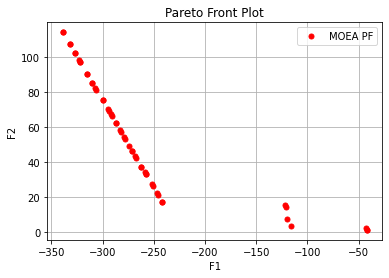

Execution time: 0.13706016540527344 s
Evaluation number: 10000
The number of non-dominated solutions is: 50
hv: 0.00000
spacing: 0.00000
{'success': True, 'stopMsg': 'The algotirhm stepped because it exceeded the generation limit.', 'optPop': <geatpy.Population.Population object at 0x00000228E78BAD88>, 'lastPop': <geatpy.Population.Population object at 0x00000228E795E808>, 'Vars': array([[ 5,  1,  2,  0,  8],
       [ 5,  1,  1,  0,  7],
       [ 5,  1,  3,  0, 10],
       [ 4,  1,  3,  0,  0],
       [ 5,  1,  4,  0,  8],
       [ 4,  1,  3,  0,  1],
       [ 5,  1,  1,  0,  5],
       [ 5,  1,  4,  0, 10],
       [ 5,  1,  4,  0,  0],
       [ 5,  1,  1,  0,  6],
       [ 1,  1,  1,  0,  1],
       [ 5,  1,  4,  0,  1],
       [ 5,  1,  4,  0,  7],
       [ 5,  1,  5,  0,  6],
       [ 5,  1,  4,  0,  9],
       [ 5,  1,  2,  0,  5],
       [ 5,  1,  3,  0,  0],
       [ 5,  1,  5,  0, 10],
       [ 5,  1,  4,  0, 10],
       [ 5,  1,  1,  0, 10],
       [ 5,  1,  5,  0,  7],
       

In [1]:
"""Demo.
min f1 = -25 * (x1 - 2)**2 - (x2 - 2)**2 - (x3 - 1)**2 - (x4 - 4)**2 - (x5 - 1)**2
min f2 = (x1 - 1)**2 + (x2 - 1)**2 + (x3 - 1)**2 + (x4 - 1)**2 + (x5 - 1)**2
s.t.
x1 + x2 >= 2
x1 + x2 <= 6
x1 - x2 >= -2
x1 - 3*x2 <= 2
4 - (x3 - 3)**2 - x4 >= 0
(x5 - 3)**2 + x4 - 4 >= 0
x1,x2,x3,x4,x5 ∈ {0,1,2,3,4,5,6,7,8,9,10}
"""

import numpy as np
import geatpy as ea


class MyProblem(ea.Problem):  # 继承Problem父类

    def __init__(self, M=2):
        name = 'MyProblem'  # 初始化name（函数名称，可以随意设置）
        Dim = 5  # 初始化Dim（决策变量维数）
        maxormins = [1] * M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        varTypes = [1] * Dim  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [0] * Dim  # 决策变量下界
        ub = [10] * Dim  # 决策变量上界
        lbin = [1] * Dim  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self,
                            name,
                            M,
                            maxormins,
                            Dim,
                            varTypes,
                            lb,
                            ub,
                            lbin,
                            ubin)

    def evalVars(self, Vars):  # 目标函数
        x1 = Vars[:, [0]]
        x2 = Vars[:, [1]]
        x3 = Vars[:, [2]]
        x4 = Vars[:, [3]]
        x5 = Vars[:, [4]]
        f1 = -25 * (x1 - 2)**2 - (x2 - 2)**2 - (x3 - 1)**2 - (x4 - 4)**2 - (x5 - 1)**2
        f2 = (x1 - 1)**2 + (x2 - 1)**2 + (x3 - 1)**2 + (x4 - 1)**2 + (x5 - 1)**2
        # 利用可行性法则处理约束条件 <=0
        CV = np.hstack([
            2 - x1 - x2,
            x1 + x2 - 6,
            -2 - x1 + x2,
            x1 - 3 * x2 - 2, (x3 - 3)**2 + x4 - 4,
            4 - (x5 - 3)**2 - x4
        ])
        f = np.hstack([f1, f2])
        return f, CV


if __name__ == '__main__':
    # 实例化问题对象
    problem = MyProblem()
    # 构建算法
    algorithm = ea.moea_NSGA2_templet(
        problem,
        ea.Population(Encoding='BG', NIND=50),
        MAXGEN=200,  # 最大进化代数
        logTras=0)  # 表示每隔多少代记录一次日志信息，0表示不记录。
    algorithm.mutOper.Pm = 0.2  # 修改变异算子的变异概率
    algorithm.recOper.XOVR = 0.9  # 修改交叉算子的交叉概率
    # 求解
    res = ea.optimize(algorithm,
                      verbose=True,
                      drawing=1,
                      outputMsg=True,
                      drawLog=False,
                      saveFlag=False)
    print(res)